<a href="https://colab.research.google.com/github/edrjayawardena/DryBeansAnalysis/blob/main/Bean_Analysis_end_to_end_Data_Analysis_Project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Data

In [ ]:
!gdown --id 1-_4NX9naX0tzRgC7nVKryGqH_znmeJky

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-_4NX9naX0tzRgC7nVKryGqH_znmeJky
To: /content/Dry_Bean.csv
100% 2.48M/2.48M [00:00<00:00, 40.8MB/s]


### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Dry_Bean.csv')

In [ ]:
data.head(2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


### Data Visualization

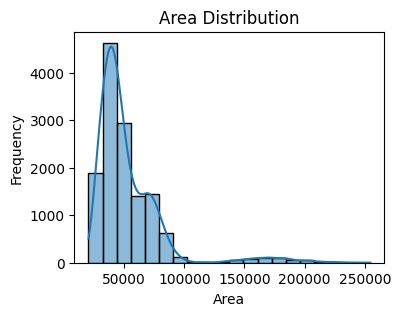

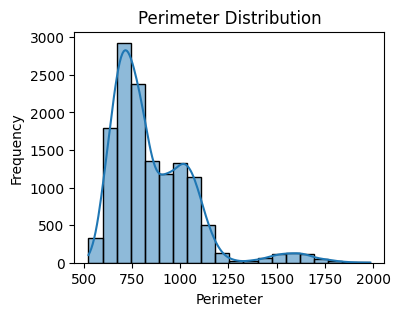

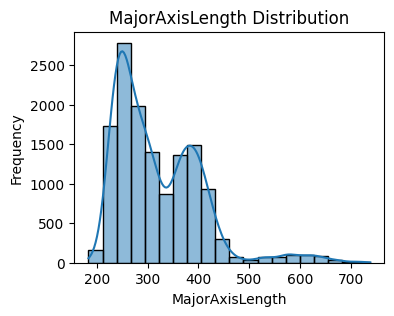

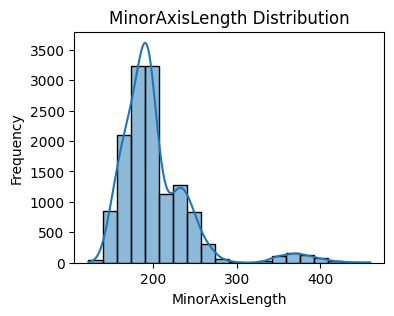

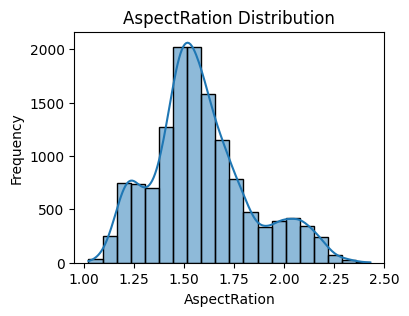

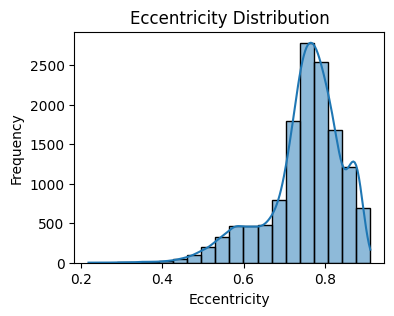

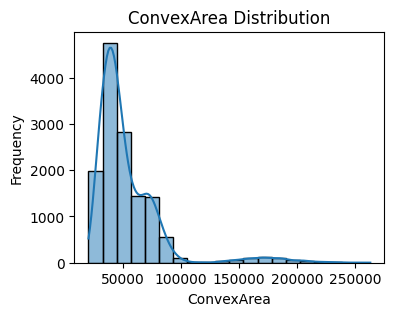

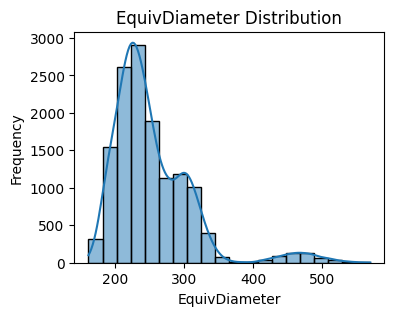

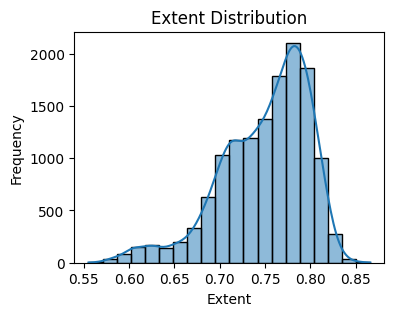

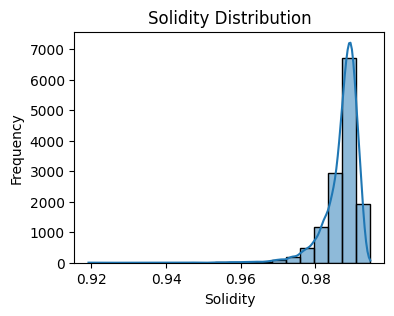

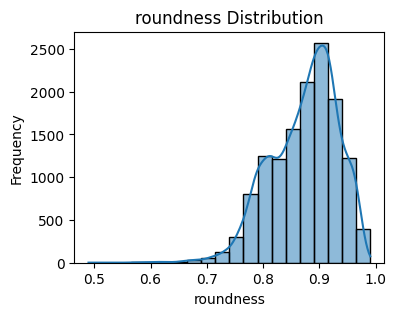

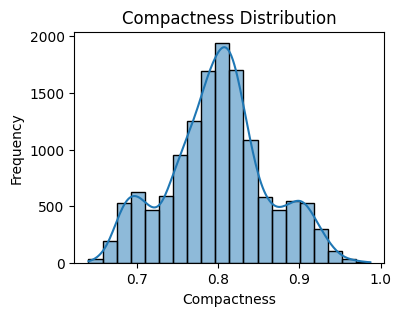

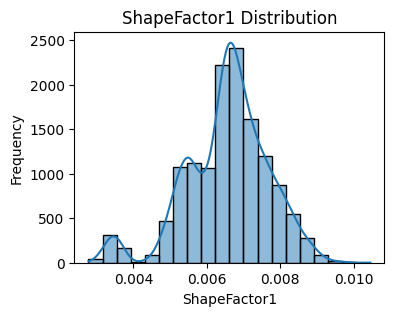

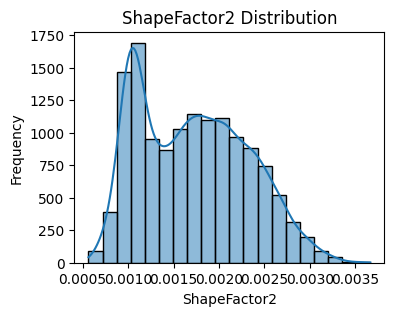

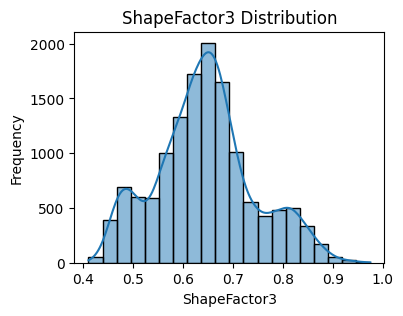

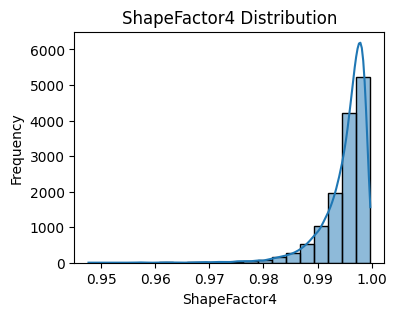

In [ ]:
# Histograms
numerical_attributes = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

# Plot histograms for numerical attributes
for attribute in numerical_attributes:
    plt.figure(figsize=(4, 3))
    sns.histplot(data[attribute], bins=20, kde=True)
    plt.title(attribute + " Distribution")
    plt.xlabel(attribute)
    plt.ylabel("Frequency")
    plt.show()

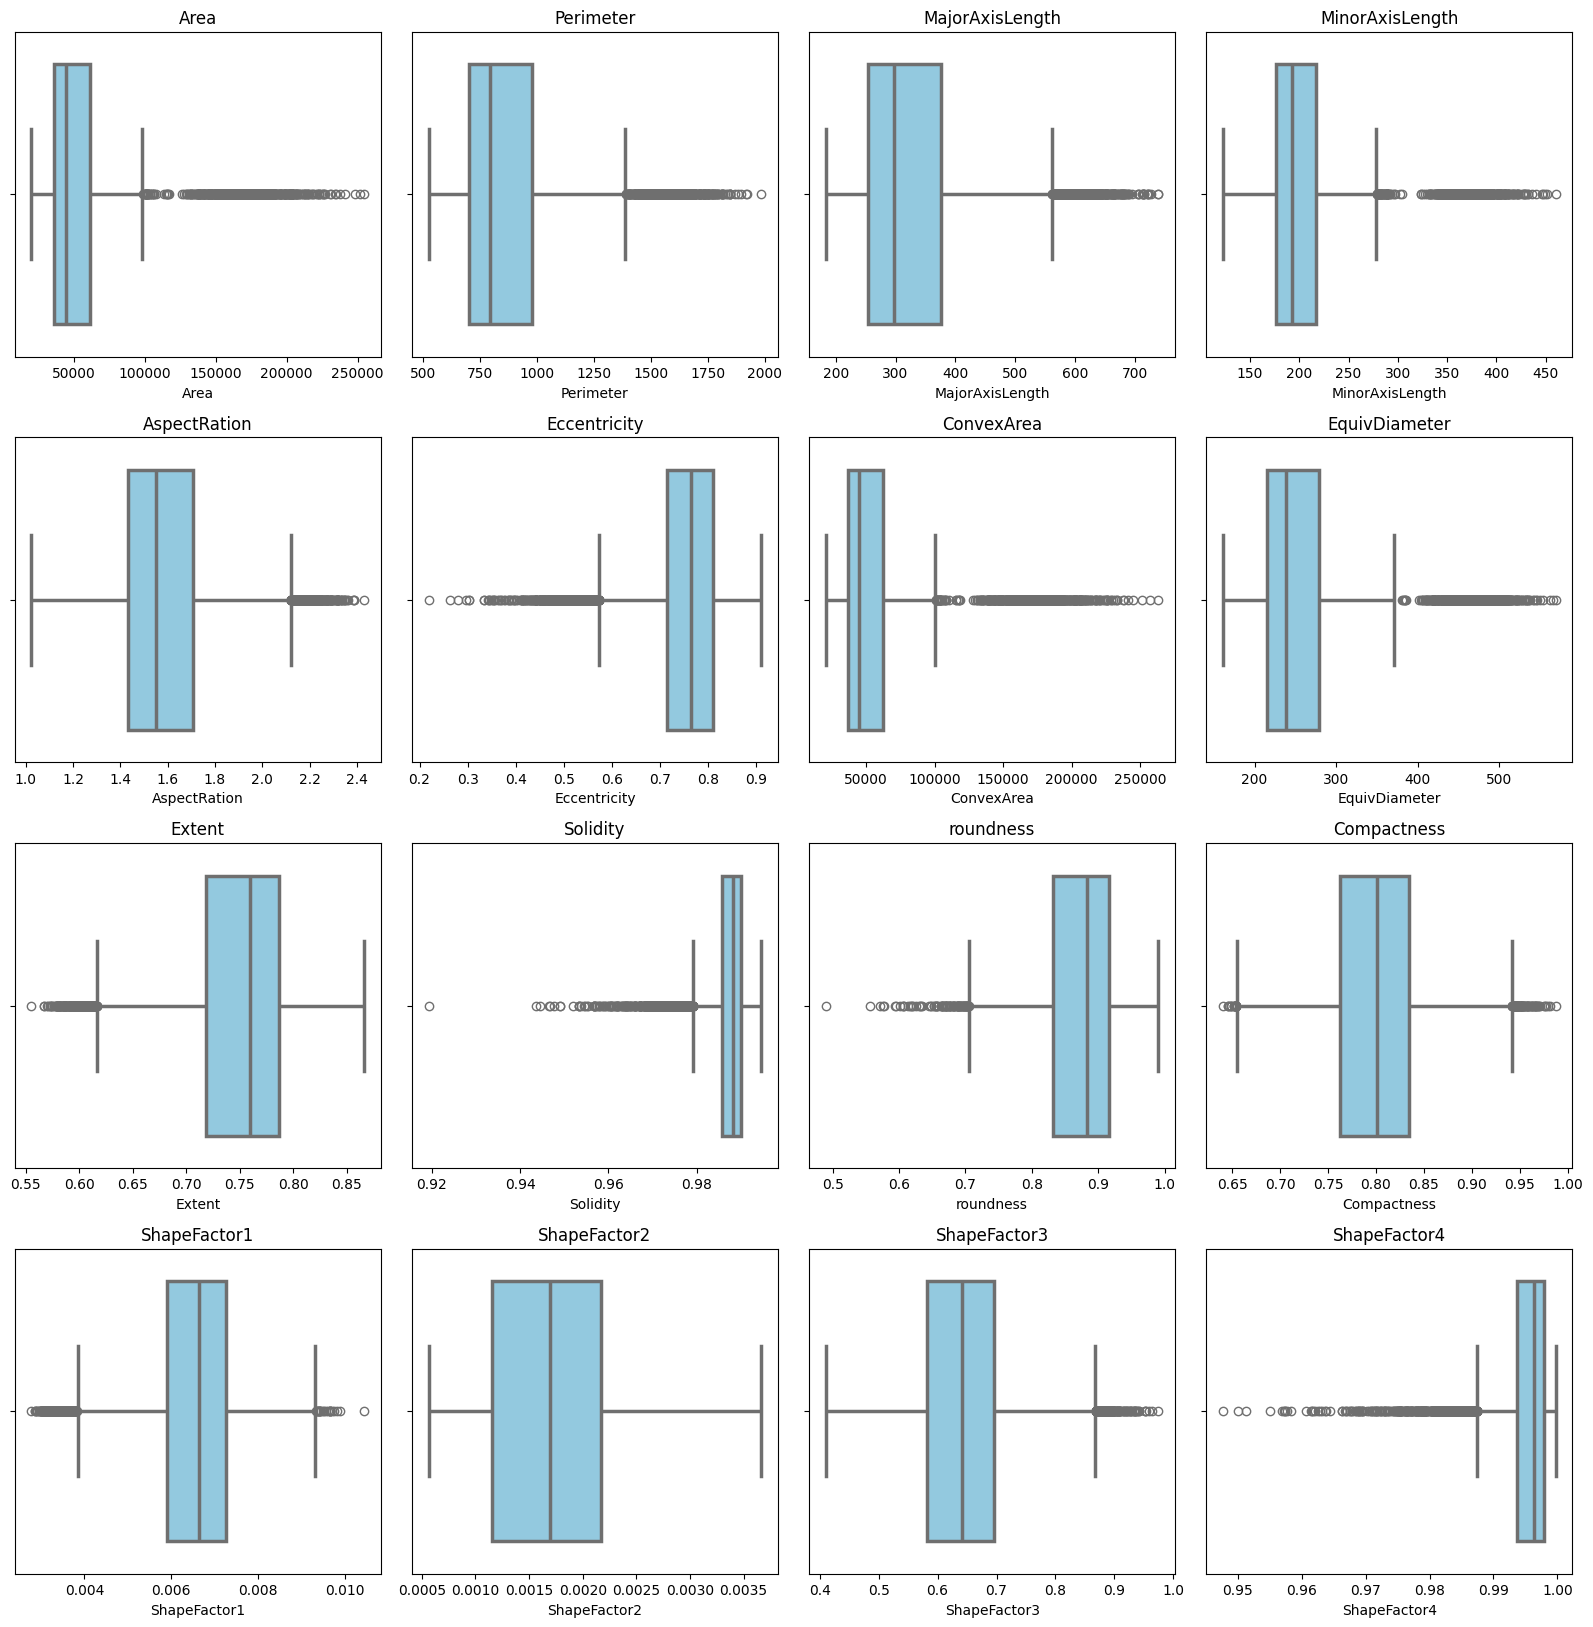

In [ ]:
# Select numerical attributes
numerical_attributes = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
                        'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness',
                        'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

# Plot separate boxplots for each numerical attribute
plt.figure(figsize=(16, 20))
for i, attribute in enumerate(numerical_attributes, start=1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=data[attribute], color='skyblue', linewidth=2.5)
    plt.title(attribute)
plt.tight_layout()
plt.show()

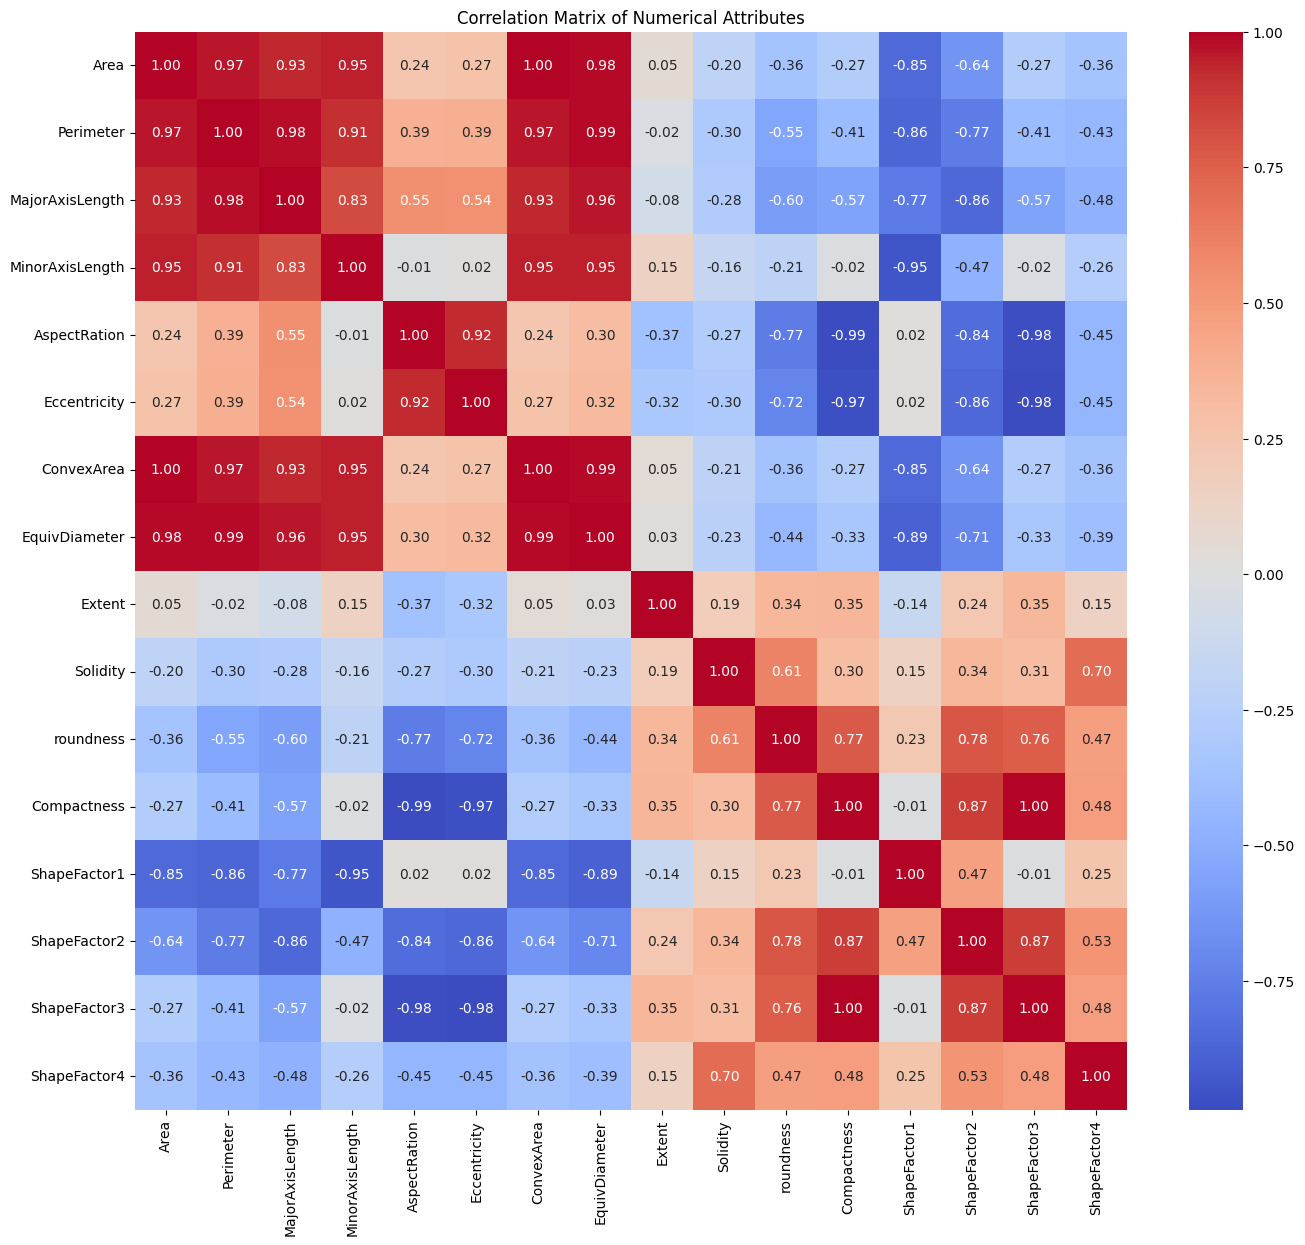

In [ ]:
# Select numerical attributes
numerical_attributes = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
                        'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness',
                        'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

# Calculate the correlation matrix for numerical attributes
correlation_matrix = data[numerical_attributes].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Attributes")
plt.show()

In [ ]:
# Analyze class distribution
class_distribution = data['Class'].value_counts()
print(class_distribution)

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


<ipython-input-16-98816f452387>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


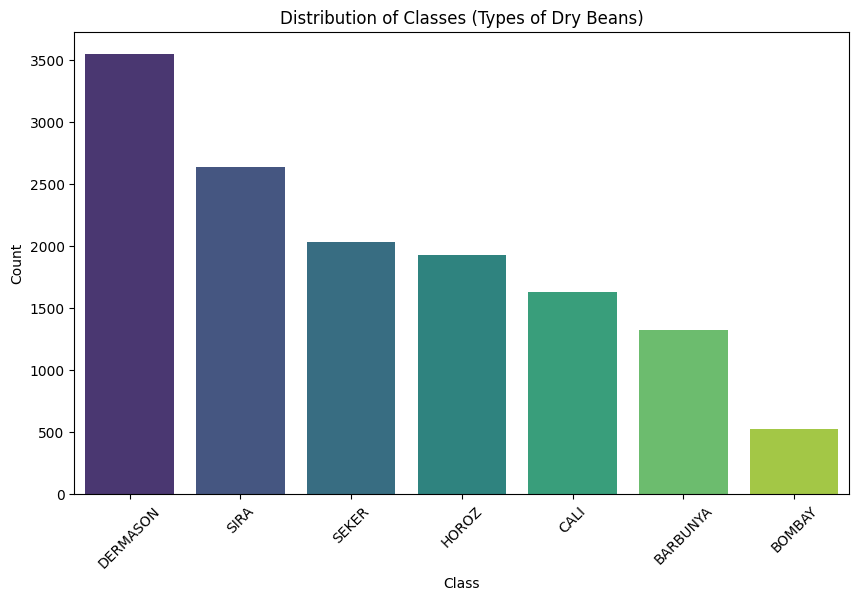

In [ ]:
# Calculate the class distribution
class_distribution = data['Class'].value_counts()

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Distribution of Classes (Types of Dry Beans)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'Class' is the target column
le = LabelEncoder()

# Fit and transform the 'Class' column
data['Class'] = le.fit_transform(data['Class'])

# Check the encoded class labels
print(data['Class'].unique())  # This will print the encoded values for each class

[5 0 1 2 4 6 3]


In [ ]:
data.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,3


In [ ]:
# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
X.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [ ]:
y.head(5)

,Class
0,5
1,5
2,5
3,5
4,5


In [ ]:
from sklearn.model_selection import train_test_split
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.count()

,0
Area,10888
Perimeter,10888
MajorAxisLength,10888
MinorAxisLength,10888
AspectRation,10888
Eccentricity,10888
ConvexArea,10888
EquivDiameter,10888
Extent,10888
Solidity,10888


In [ ]:
y_train.count()

10888

In [ ]:
X_test.count()

,0
Area,2723
Perimeter,2723
MajorAxisLength,2723
MinorAxisLength,2723
AspectRation,2723
Eccentricity,2723
ConvexArea,2723
EquivDiameter,2723
Extent,2723
Solidity,2723


In [ ]:
from imblearn.over_sampling import SMOTE

#Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Check the class distribution after applying SMOTE
class_distribution = pd.Series(y_train_resampled).value_counts()
class_distribution

,count
Class,
3,2875
5,2875
0,2875
6,2875
2,2875
4,2875
1,2875


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#convert to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_test_scaled_df.head(2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.596821,-0.774738,-0.895415,-0.305455,-1.415949,-1.675587,-0.602024,-0.63107,0.405621,1.132255,1.777449,1.588477,0.099138,1.397500,1.631828,1.120447
1,-0.038618,0.393292,0.059185,0.151273,-0.176105,0.109416,-0.017501,0.10120,0.330857,-3.053145,-2.369247,0.007407,-0.424589,-0.317643,-0.031714,-1.883005


In [ ]:
X_train_scaled_df.head(2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.882580,-1.127212,-1.113232,-1.041912,-0.462109,-0.179369,-0.882339,-1.096322,-1.244517,-0.183606,0.658328,0.378585,1.511868,1.131005,0.341758,0.475311
1,-0.688347,-0.727819,-0.801156,-0.717223,-0.377479,-0.088652,-0.686208,-0.770923,-0.972743,-0.634486,-0.408095,0.277940,0.806655,0.602836,0.239456,0.178898


In [ ]:
# Check summary statistics of the scaled training data
print(X_train_scaled_df.describe())

               Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count  2.012500e+04  2.012500e+04     20125.000000     2.012500e+04   
mean   2.259614e-17 -2.033653e-16         0.000000    -4.519228e-17   
std    1.000025e+00  1.000025e+00         1.000025     1.000025e+00   
min   -1.069079e+00 -1.502353e+00        -1.559130    -1.572828e+00   
25%   -6.408387e-01 -7.693233e-01        -0.817760    -6.418743e-01   
50%   -3.609615e-01 -2.000215e-01        -0.101282    -3.628527e-01   
75%    1.178029e-01  3.489498e-01         0.382260     2.278436e-01   
max    3.976811e+00  3.406787e+00         3.252125     3.474408e+00   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter        Extent  \
count  2.012500e+04  2.012500e+04  2.012500e+04   2.012500e+04  2.012500e+04   
mean  -6.496391e-16  8.360572e-16  2.259614e-17   3.389421e-17 -1.333172e-15   
std    1.000025e+00  1.000025e+00  1.000025e+00   1.000025e+00  1.000025e+00   
min   -2.361598e+00 -5.917884e+00 -1.069

In [ ]:
# Check summary statistics of the scaled testing data
print(X_test_scaled_df.describe())

              Area    Perimeter  MajorAxisLength  MinorAxisLength  \
count  2723.000000  2723.000000      2723.000000      2723.000000   
mean     -0.350791    -0.374637        -0.358728        -0.365351   
std       0.657435     0.737168         0.756128         0.694890   
min      -1.062809    -1.500078        -1.543699        -1.426422   
25%      -0.720471    -0.892303        -0.946228        -0.762813   
50%      -0.538691    -0.575335        -0.550706        -0.524506   
75%      -0.176165     0.019744         0.130525        -0.143645   
max       3.375064     2.937882         3.094730         3.312106   

       AspectRation  Eccentricity   ConvexArea  EquivDiameter       Extent  \
count   2723.000000   2723.000000  2723.000000    2723.000000  2723.000000   
mean      -0.058708     -0.056413    -0.350844      -0.370278    -0.030260   
std        1.021308      1.018680     0.658800       0.710686     1.051035   
min       -2.270054     -5.061824    -1.063079      -1.447480    -

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Define a function to train models and evaluate accuracy
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    return train_accuracy, test_accuracy

# Step 3: Initialize and evaluate each model
models = {
    "Multi-class SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Dictionary to hold the results
results = {}

for name, model in models.items():
    train_acc, test_acc = train_and_evaluate(model, X_train_scaled_df, y_train_resampled, X_test_scaled_df, y_test)
    results[name] = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    }

# Print the results
for model_name, accuracy in results.items():
    print(f"{model_name} - Train Accuracy: {accuracy['Train Accuracy']:.4f}, Test Accuracy: {accuracy['Test Accuracy']:.4f}")

Multi-class SVM - Train Accuracy: 0.9516, Test Accuracy: 0.9339
MLP - Train Accuracy: 0.9598, Test Accuracy: 0.9328
Logistic Regression - Train Accuracy: 0.9438, Test Accuracy: 0.9273
Decision Tree - Train Accuracy: 1.0000, Test Accuracy: 0.8990
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.9232
KNN - Train Accuracy: 0.9652, Test Accuracy: 0.9240
Gradient Boosting - Train Accuracy: 0.9711, Test Accuracy: 0.9295


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for each model

param_grid_svm = {
    'C': uniform(0.1, 10),         # Random values of 'C' from 0.1 to 10
    'gamma': ['scale', 'auto'],     # Choices for gamma
    'kernel': ['linear', 'rbf']     # Linear or RBF kernel
}

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],  # Different layer sizes
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['adam', 'sgd'],       # Solvers
    'alpha': uniform(0.0001, 0.001), # Regularization parameter
}

param_grid_rf = {
    'n_estimators': randint(50, 150),    # Number of trees in the forest
    'max_depth': randint(5, 20),         # Depth of trees
    'min_samples_split': randint(2, 10), # Minimum samples to split a node
}

# Initialize models
svm_model = SVC()
mlp_model = MLPClassifier(max_iter=500)
rf_model = RandomForestClassifier()

# Perform RandomizedSearchCV for each model

# SVM Hyperparameter tuning
random_search_svm = RandomizedSearchCV(svm_model, param_distributions=param_grid_svm, n_iter=10, cv=3, random_state=42)
random_search_svm.fit(X_train_scaled_df, y_train_resampled)
print("Best SVM parameters:", random_search_svm.best_params_)

# MLP Hyperparameter tuning
random_search_mlp = RandomizedSearchCV(mlp_model, param_distributions=param_grid_mlp, n_iter=10, cv=3, random_state=42)
random_search_mlp.fit(X_train_scaled_df, y_train_resampled)
print("Best MLP parameters:", random_search_mlp.best_params_)

# Random Forest Hyperparameter tuning
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_grid_rf, n_iter=10, cv=3, random_state=42)
random_search_rf.fit(X_train_scaled_df, y_train_resampled)
print("Best Random Forest parameters:", random_search_rf.best_params_)

Best SVM parameters: {'C': 8.424426408004217, 'gamma': 'auto', 'kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best MLP parameters: {'activation': 'tanh', 'alpha': 0.0008965429868602329, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
Best Random Forest parameters: {'max_depth': 17, 'min_samples_split': 6, 'n_estimators': 132}


In [ ]:
from sklearn.svm import SVC

# Initialize SVM with the best parameters
svm_best = SVC(C=8.424426408004217, gamma='auto', kernel='rbf')

# Train the SVM model on the scaled training data
svm_best.fit(X_train_scaled_df, y_train_resampled)

# Evaluate the model on training data
train_accuracy = svm_best.score(X_train_scaled_df, y_train_resampled)
print(f"Train Accuracy: {train_accuracy:.4f}")

# Evaluate the model on test data
test_accuracy = svm_best.score(X_test_scaled_df, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9554
Test Accuracy: 0.9324


In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP with the best parameters
mlp_best = MLPClassifier(activation='tanh', alpha=0.0003912291401980419,
                         hidden_layer_sizes=(50, 50), solver='adam', max_iter=500)

# Train the MLP model on the scaled training data
mlp_best.fit(X_train_scaled_df, y_train_resampled)

# Evaluate the MLP model on training data
mlp_train_accuracy = mlp_best.score(X_train_scaled_df, y_train_resampled)
print(f"MLP Train Accuracy: {mlp_train_accuracy:.4f}")

# Evaluate the MLP model on test data
mlp_test_accuracy = mlp_best.score(X_test_scaled_df, y_test)
print(f"MLP Test Accuracy: {mlp_test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Train Accuracy: 0.9770
MLP Test Accuracy: 0.9284


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with the best parameters
rf_best = RandomForestClassifier(max_depth=19, min_samples_split=4, n_estimators=121, random_state=42)

# Train the Random Forest model on the resampled training data
rf_best.fit(X_train_scaled_df, y_train_resampled)

# Evaluate the Random Forest model on training data
rf_train_accuracy = rf_best.score(X_train_scaled_df, y_train_resampled)
print(f"Random Forest Train Accuracy: {rf_train_accuracy:.4f}")

# Evaluate the Random Forest model on test data
rf_test_accuracy = rf_best.score(X_test_scaled_df, y_test)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")

Random Forest Train Accuracy: 0.9965
Random Forest Test Accuracy: 0.9273


### Model Performance

| Model                  | Train Accuracy | Test Accuracy |
|------------------------|----------------|---------------|
| Multi-class SVM       | 0.9516         | 0.9339        |
| MLP                    | 0.9609         | 0.9321        |
| Logistic Regression     | 0.9438         | 0.9273        |
| Decision Tree          | 1.0000         | 0.8990        |
| Random Forest          | 1.0000         | 0.9247        |
| KNN                    | 0.9652         | 0.9240        |
| Gradient Boosting      | 0.9711         | 0.9295        |

Insights Gained
- The Multi-class SVM and MLP models showed strong performance with high test accuracies (around 93-94%).
- The Decision Tree and Random Forest models achieved perfect training accuracy (1.0000), but their test accuracy was lower, indicating potential overfitting.
- Logistic Regression performed slightly lower compared to other models, but it still provided reasonable accuracy.
- KNN and Gradient Boosting also performed well, achieving test accuracies above 92%.


### Conclusion



In this project, successfully built and evaluated several machine learning models for classifying dry beans. The Multi-class SVM and MLP models provided the best balance of training and testing accuracy.